#Data Overview

In [120]:
# Import packages

# Basic data processing
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import folium
import folium.plugins

In [121]:
# Load python modules

import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames 

In [122]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [123]:
# Load dataset from local drive 
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
dataset = pd.read_csv(io.BytesIO(uploaded['OPTION1_uk_road_accident_2019_coursework_final.csv'])) # python will expect the first file 
dataset.head(3)

Saving OPTION1_uk_road_accident_2019_coursework_final.csv to OPTION1_uk_road_accident_2019_coursework_final (1).csv


,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious


In [124]:
print(dataset.shape)

(31647, 14)


In [125]:
print(dataset.columns)

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


In [126]:
print(dataset.dtypes)

accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


In [127]:
dataset.head(10)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
5,2019400862270,60,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,male and female,NaN,serious
6,2019420894599,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
7,2019010162791,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight
8,2019360909153,60,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,fatal
9,2019500856761,60,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,male and female,60.0,fatal


In [128]:
dataset.sample(10)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
606,2019010167305,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,NaN,slight
9727,2019010172321,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,21.0,fatal
16520,2019010173668,20,daylight,fine,dry,at least one biped,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,20.0,serious
4114,2019010192218,30,daylight,fine,dry,at least one van,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,at least one vehicle with frontal impact,data missing or out of range,NaN,slight
26387,2019010210204,30,darkness,other,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,54.0,serious
18,201931c182719,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,53.0,slight
151,2019522001323,30,darkness,fine,wet or damp,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,54.0,serious
18313,2019010210601,30,darkness,fine,dry,biped and van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,45.0,fatal
5334,2019471901302,30,darkness,fine,wet or damp,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,47.0,slight
21803,2019350841531,20,daylight,fine,wet or damp,at least one biped,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious


In [129]:
# Summary statistics for numerical features
dataset.describe()


,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


#Data preprocessing

In [130]:
dataset = dataset.drop(['accident_index'], axis=1)
print("The DataFrame object after deleting the column accident_index")
dataset

The DataFrame object after deleting the column accident_index


,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,60,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,70,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


In [131]:
# let's list all categorical and numarical features
categorical_columns = ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type',
                    'junction_location', 'skidding_and_overturning', 'vehicle_leaving_carriageway',
                    'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver','accident_severity']
numerical_columns = ['speed_limit', 'age_of_oldest_driver']

In [132]:
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  #reduced_dataset[col].value_counts()
  pretty_print_df(dataset[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655
data missing or out of range,1863



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,15494
male and female,7015
data missing or out of range,5122
all females,4016



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8


In [133]:
# let's get the numeric and their count for each feature
for col in numerical_columns:
  print(f"Numeric and number of occurrences for '{col}'")
  #reduced_dataset[col].value_counts()
  pretty_print_df(dataset[col].value_counts())
  print()

Numeric and number of occurrences for 'speed_limit'


,speed_limit
30,18682
60,4186
20,3222
40,2714
70,1595
50,1223
-1,25



Numeric and number of occurrences for 'age_of_oldest_driver'


,age_of_oldest_driver
30.0,671
50.0,662
48.0,589
54.0,586
40.0,578
53.0,558
56.0,544
49.0,543
51.0,537
47.0,524


In [134]:
dataset.loc[dataset.accident_severity=='Fatal','accident_severity'] = 'fatal'
dataset.loc[dataset.accident_severity=='Slight','accident_severity'] = 'slight'
dataset.loc[dataset.accident_severity=='Serious','accident_severity'] = 'serious'


In [135]:
# Number of missing values per column
dataset.isna().sum()

speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

In [136]:
# Number of missing values per column
dataset.isna().sum()

speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

In [137]:
print(dataset["age_of_oldest_driver"].isnull().sum())
print(dataset["accident_severity"].isnull().sum())


6450
1172


In [138]:
from sklearn.impute import SimpleImputer 

#replace values that are missing or out of range with NaN
dataset = dataset.replace('data missing or out of range', np.nan)

# Create an instance of the SimpleImputer class with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data
imputer = imputer.fit(dataset[categorical_columns])

# Transform the data using the imputer
dataset[categorical_columns] = imputer.transform(dataset[categorical_columns]) 


In [139]:
# handling missing data
# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for numeric features)
imptr_num = imptr_num.fit(dataset[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
dataset[numerical_columns] = \
  imptr_num.transform(dataset[numerical_columns]) # apply the transformation using the parameters estimated above

# note column ApplicantIncome in the first row --> before it was a missing value!
dataset

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30.0,serious
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30.0,serious
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


In [140]:
# 1. Imputer
imptr_age = SimpleImputer(missing_values = np.nan, strategy = 'mean')  

# 2. Fit the imputer object to the feature matrix
imptr_age = imptr_age.fit(dataset[['age_of_oldest_driver']])

# 3. Call Transform to replace missing data in dataset (on specific columns) by the mean of the column to which that missing data belongs to
dataset[['age_of_oldest_driver']] = imptr_age.transform(dataset[['age_of_oldest_driver']]) 

dataset


,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30.0,serious
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30.0,serious
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


In [141]:
# Number of missing values per column
dataset.isna().sum()

speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

In [142]:
# displaying the datatypes
display(dataset.dtypes)
  
# converting 'age_of_oldest_driver' from float to int
dataset['age_of_oldest_driver'] = dataset['age_of_oldest_driver'].astype(int)
dataset

speed_limit                    float64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63,serious
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82,fatal
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30,serious
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30,serious
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27,serious
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27,serious
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67,slight
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24,fatal


In [143]:
# 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(dataset[categorical_columns])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
dataset[categorical_columns] = imptr_cat.transform(dataset[categorical_columns])  


In [144]:
#Remove negative values
reduced_dataset = dataset._get_numeric_data()
reduced_dataset[reduced_dataset < 0] = 0
reduced_dataset

,speed_limit,age_of_oldest_driver
0,30.0,63
1,30.0,82
2,40.0,30
3,40.0,30
4,30.0,39
...,...,...
31642,30.0,27
31643,60.0,27
31644,70.0,67
31645,30.0,24


In [145]:
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  #reduced_dataset[col].value_counts()
  pretty_print_df(dataset[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,26122
other,5407
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22457
wet or damp,8761
other,374
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17550
at least one biped,8662
at least one van,4040
biped and van,1000
other,395



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,18674
not at or within 20 metres of junction,12973



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,26421
at least one vehicle skidded or overturned,5226



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,25986
at least one vehicle leaving carriageway,5661



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,27992
at least one vehicle hit an object,3655



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,24306
other points of impact,6008
no impact,1333



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,20616
male and female,7015
all females,4016



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,13863
serious,11617
fatal,6167


In [146]:
# let's get the numeric and their count for each feature
for col in numerical_columns:
  print(f"Numeric and number of occurrences for '{col}'")
  #reduced_dataset[col].value_counts()
  pretty_print_df(dataset[col].value_counts())
  print()

Numeric and number of occurrences for 'speed_limit'


,speed_limit
30.0,18682
60.0,4186
20.0,3222
40.0,2714
70.0,1595
50.0,1223
0.0,25



Numeric and number of occurrences for 'age_of_oldest_driver'


,age_of_oldest_driver
30,7121
50,662
48,589
54,586
40,578
53,558
56,544
49,543
51,537
52,524


In [147]:
dataset

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63,serious
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82,fatal
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30,serious
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30,serious
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27,serious
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27,serious
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67,slight
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24,fatal


##Feature Engineering

###Encoding categorical Data
Data Preprocessing in machine learning requires values of the data in numerical form. Therefore text values in the columns of datasets must be converted into numerical form.

###Converting categorical to numerical values
Given the original dataset, it is clear we have a few categorical features. All these need to be encoded. The LabelEncoder class is used to transform the categorical or string values to numerical ones (between 0 and n_classes-1).

In [148]:
#We are using the dataset with no missing values
temp_dataset = dataset.copy() #since this is not the final transformation, we make a copy and use a temporary variable name

# encode categorical data for the 'accident_severity' column
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
# apply LblEncoder object to our categorical variables (columns - 'accident_severity') using the fit_transform method. This returns the column encoded.
temp_dataset['accident_severity'] = lblEncoder_X.fit_transform(temp_dataset['accident_severity']) # we can fit and transform all at once

# printing the value counts will show the encoded labels, instead of the original ones
print(temp_dataset['accident_severity'].value_counts())

2    13863
1    11617
0     6167
Name: accident_severity, dtype: int64


In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# define the transformation
# ColumnTransformer takes a list of transformations. Each transformation is expressed
# as a tuple (name, transformer, columns).
ct = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply 
            ["accident_severity"], #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# create dataset copy for testing purposes
tmp_dataset_no_nans = dataset.copy()

# the output is an NUMPY ARRAY with the encoded columns.
encoded_array= ct.fit_transform(tmp_dataset_no_nans) 

# What if we want a dataframe back? We can combine the array with the info about
# the original and transformed column names. 
# This is stored in the ColumnTransformer object, which we called "ct"
# We can access it via the "get_feature_names_out()" attribute like this:
encoded_col_names= ct.get_feature_names_out() #remember python's dot notation
print(encoded_col_names) #note the combined name: original column + category 

tmp_dataset_no_nans = pd.DataFrame(encoded_array, columns=encoded_col_names)


['accident_severity_fatal' 'accident_severity_serious'
 'accident_severity_slight' 'speed_limit' 'light_conditions'
 'weather_conditions' 'road_surface_conditions' 'vehicle_type'
 'junction_location' 'skidding_and_overturning'
 'vehicle_leaving_carriageway' 'hit_object_off_carriageway'
 'first_point_of_impact' 'sex_of_driver' 'age_of_oldest_driver']


Perform one-hot encoding for ALL the categorical features at once.

In [150]:
# make sure numerical columns are of type float
dataset_no_nans= dataset.astype(dtype={col: "float64" for col in numerical_columns})
dataset_no_nans

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30.0,serious
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30.0,serious
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


In [151]:
sampleClassBias = dataset['accident_severity'].value_counts()
print('Training Labels distribution:')
pretty_print_df(sampleClassBias)

Training Labels distribution:


,accident_severity
slight,13863
serious,11617
fatal,6167


In [152]:
#normalisation - let's work on a copy of the dataset for this one
ddummy = dataset.copy()

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler

min_max_num=MinMaxScaler()

# Normalising (or MinMax scaling)
# Scalers expect a 2-dimensional input: a dataframe is 2-dimensional, a pandas Series is NOT.
# passing one column in double square brackets tells pandas to return a dataframe rather than a series
# try comparing type(ddummy[['age_of_oldest_driver']]) and type(ddummy['age_of_oldest_driver'])

ddummy['age_of_oldest_driver']=min_max_num.fit_transform(ddummy[['age_of_oldest_driver']]) 
ddummy[['age_of_oldest_driver']]


,age_of_oldest_driver
0,0.600000
1,0.800000
2,0.252632
3,0.252632
4,0.347368
...,...
31642,0.221053
31643,0.221053
31644,0.642105
31645,0.189474


In [153]:
# Standardisation - let's work on a copy again
ddummy = dataset.copy()

#Standardizing (removing mean and dividing by standard deviation)
from sklearn.preprocessing import StandardScaler
scaler_num= StandardScaler()
ddummy['age_of_oldest_driver']=scaler_num.fit_transform(ddummy[['age_of_oldest_driver']]) 

ddummy[['age_of_oldest_driver']]



,age_of_oldest_driver
0,1.166949
1,2.317994
2,-0.832235
3,-0.832235
4,-0.287003
...,...
31642,-1.013979
31643,-1.013979
31644,1.409275
31645,-1.195723


Perform standardization on all the numerical features at once.

In [154]:
my_scaler_num= StandardScaler()
ddummy[numerical_columns]=my_scaler_num.fit_transform(ddummy[numerical_columns]) 

ddummy[numerical_columns]

,speed_limit,age_of_oldest_driver
0,-0.475085,1.166949
1,-0.475085,2.317994
2,0.247718,-0.832235
3,0.247718,-0.832235
4,-0.475085,-0.287003
...,...,...
31642,-0.475085,-1.013979
31643,1.693324,-1.013979
31644,2.416127,1.409275
31645,-0.475085,-1.195723


Perform normalization on all the numerical features at once.

In [155]:
my_scaler_num= MinMaxScaler()
ddummy[numerical_columns]=my_scaler_num.fit_transform(ddummy[numerical_columns]) 

ddummy[numerical_columns]

,speed_limit,age_of_oldest_driver
0,0.428571,0.600000
1,0.428571,0.800000
2,0.571429,0.252632
3,0.571429,0.252632
4,0.428571,0.347368
...,...,...
31642,0.428571,0.221053
31643,0.857143,0.221053
31644,1.000000,0.642105
31645,0.428571,0.189474


number of columns in the dataset

In [156]:
print('Before: ', len(dataset.columns))
print('After: ', len(dataset.columns))

Before:  13
After:  13


In [157]:
dataset.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,31647.000000
mean,36.572819,43.737479
std,13.835245,16.506996
min,0.000000,6.000000
25%,30.000000,30.000000
50%,30.000000,40.000000
75%,40.000000,55.000000
max,70.000000,101.000000


##One Hot Encoding

In [158]:
from sklearn.preprocessing import OneHotEncoder

# create a 'OneHotEncoder' object 
oneHotEncoder = OneHotEncoder()                     

# create dataset copy for testing purposes
tmp_dataset_no_nans = dataset.copy()

# fit the OneHotEncoder object to feature accident_severity
onehot_enc = oneHotEncoder.fit(tmp_dataset_no_nans[['accident_severity']])           
print('The categories are: ', onehot_enc.categories_)

# onehot_enc is an array of shape  containing the one-hot encoding of the feature accident_severity of the dataframe dataset_no_nans
# we make a temporary object to be able to manipulate the extra number of columns
dum = onehot_enc.transform(tmp_dataset_no_nans[['accident_severity']]).toarray()           
dum

# we add to the dataset_no_nans one feature column called Female and add there the corresponding encoded values
tmp_dataset_no_nans['serious'] = dum[:,0]     
# we add to the dataset_no_nans one feature column called Male and add there the corresponding encoded values
tmp_dataset_no_nans['fatal'] = dum[:,1]  
# add the 'other' category for accident_severity
tmp_dataset_no_nans['slight']= dum[:,2]  

# let's show the dataframe: look at the last three columns
tmp_dataset_no_nans


The categories are:  [array(['fatal', 'serious', 'slight'], dtype=object)]


,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity,serious,fatal,slight
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63,serious,0.0,1.0,0.0
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82,fatal,1.0,0.0,0.0
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30,serious,0.0,1.0,0.0
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30,serious,0.0,1.0,0.0
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39,slight,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27,serious,0.0,1.0,0.0
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27,serious,0.0,1.0,0.0
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67,slight,0.0,0.0,1.0
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24,fatal,1.0,0.0,0.0


In [159]:
one_hot_features = ['light_conditions', 'weather_conditions']

In [160]:
# light_conditions Categorizing
data_light_condition_df = tmp_dataset_no_nans[categorical_columns].copy()

data_light_condition_df['daylight'] = np.where(tmp_dataset_no_nans['light_conditions'].str.contains('daylight', case=False, na = False), 1, 0)
data_light_condition_df['darkness'] = np.where(tmp_dataset_no_nans['light_conditions'].str.contains('darkness', case=False, na = False), 1, 0)

data_light_condition_df


,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,accident_severity,daylight,darkness
0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,serious,0,1
1,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,fatal,0,1
2,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,serious,1,0
3,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,serious,1,0
4,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,slight,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,serious,0,1
31643,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,serious,1,0
31644,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,slight,1,0
31645,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,fatal,0,1


In [161]:
# Weather_Condition Categorizing

data_weather_condition_df = tmp_dataset_no_nans[categorical_columns].copy()

data_weather_condition_df['fine'] = np.where(tmp_dataset_no_nans['weather_conditions'].str.contains('fine', case=False, na = False), 1, 0)
data_weather_condition_df['fog or mist'] = np.where(tmp_dataset_no_nans['weather_conditions'].str.contains('fog or mist', case=False, na = False), 1, 0)
data_weather_condition_df['other'] = np.where(tmp_dataset_no_nans['weather_conditions'].str.contains('other', case=False, na = False), 1, 0)
data_weather_condition_df['data missing or out of range'] = np.where(tmp_dataset_no_nans['weather_conditions'].str.contains('data missing or out of range', case=False, na = False), 1, 0)

data_weather_condition_df

,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,accident_severity,fine,fog or mist,other,data missing or out of range
0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,serious,0,0,1,0
1,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,fatal,1,0,0,0
2,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,serious,1,0,0,0
3,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,serious,1,0,0,0
4,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,slight,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,serious,1,0,0,0
31643,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,serious,1,0,0,0
31644,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,slight,1,0,0,0
31645,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,fatal,1,0,0,0


In [162]:
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  #reduced_dataset[col].value_counts()
  pretty_print_df(dataset[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,26122
other,5407
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22457
wet or damp,8761
other,374
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17550
at least one biped,8662
at least one van,4040
biped and van,1000
other,395



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,18674
not at or within 20 metres of junction,12973



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,26421
at least one vehicle skidded or overturned,5226



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,25986
at least one vehicle leaving carriageway,5661



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,27992
at least one vehicle hit an object,3655



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,24306
other points of impact,6008
no impact,1333



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,20616
male and female,7015
all females,4016



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,13863
serious,11617
fatal,6167


In [163]:
# let's get the numeric and their count for each feature
for col in numerical_columns:
  print(f"Numeric and number of occurrences for '{col}'")
  #reduced_dataset[col].value_counts()
  pretty_print_df(dataset[col].value_counts())
  print()

Numeric and number of occurrences for 'speed_limit'


,speed_limit
30.0,18682
60.0,4186
20.0,3222
40.0,2714
70.0,1595
50.0,1223
0.0,25



Numeric and number of occurrences for 'age_of_oldest_driver'


,age_of_oldest_driver
30,7121
50,662
48,589
54,586
40,578
53,558
56,544
49,543
51,537
52,524


#Exploratory Data Analysis (EDA)

In [164]:
# Count the number of each severity, transform the result to pandas dataframe
severity_counts = dataset["accident_severity"].value_counts()
severity_counts_df = pd.DataFrame(severity_counts)
severity_counts_df

# Calculate the proportion of each Severity
severity_percentage_df = severity_counts_df / sum(severity_counts_df["accident_severity"]) * 100
severity_percentage_df


,accident_severity
slight,43.805100
serious,36.708061
fatal,19.486839


In [165]:
# Visualize the distribution of accidents severity
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

severity_fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{"type": "xy"}, {"type": "domain"}]])

severity_fig.add_trace(go.Bar(x=severity_counts_df.index, 
                              y=severity_counts_df["accident_severity"],
                              text=severity_counts_df["accident_severity"],
                              textposition='outside',
                              showlegend=False),
                              1, 1)

severity_fig.add_trace(go.Pie(labels=severity_percentage_df.index, 
                     values=severity_percentage_df["accident_severity"],
                     showlegend=True),
                     1, 2)

severity_fig.update_layout(
                  height=600, 
                  width=1500,
                  title={
                  'text': "The distribution of accidents severity",
                  'font': {'size': 24},
                  'y':0.95,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  xaxis1_title = 'Severity',
                  yaxis1_title = 'Counts',
                  legend_title_text="Severity"
                 )
severity_fig.update_xaxes(type='category')
severity_fig.show()

In [166]:
# Calculate the mean speed limit of each Severity
mean_distance = dataset.groupby('accident_severity')["speed_limit"].mean().round(2)
mean_distance_df = pd.DataFrame(mean_distance)

mean_distance_fig = px.bar(mean_distance_df, 
                                   x = mean_distance_df.index, 
                                   y = "speed_limit", 
                                   labels={"index": "accident_severity"},
                                   text="speed_limit")
mean_distance_fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    title={
        'text': "Mean Speed Limit of each Severity",
        'y':0.95,
        'x':0.5,
        'font': {'size': 24},
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis={
        'type':'category'
    })
mean_distance_fig.show()

In [167]:
# Frequent road_surface_conditions with the Most Accidents
road_surface_conditions_accidents_count = dataset["road_surface_conditions"].value_counts()
road_surface_conditions_accidents_count_top10 = road_surface_conditions_accidents_count[:10]
road_surface_conditions_accidents_count_top10_df = pd.DataFrame(road_surface_conditions_accidents_count_top10)

road_surface_conditions_accidents_count_top10_fig = px.bar(road_surface_conditions_accidents_count_top10_df, 
                                         x = road_surface_conditions_accidents_count_top10_df.index, 
                                         y = "road_surface_conditions", 
                                         labels={"index": "road_surface_conditions", "road_surface_conditions": "Counts"},
                                         text="road_surface_conditions")
road_surface_conditions_accidents_count_top10_fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title={
        'text': "Road surface conditions with the most Accidents",
        'y':0.95,
        'x':0.5,
        'font': {'size': 24},
        'xanchor': 'center',
        'yanchor': 'top'})
road_surface_conditions_accidents_count_top10_fig.update_yaxes(categoryorder = "total ascending")
road_surface_conditions_accidents_count_top10_fig.show()

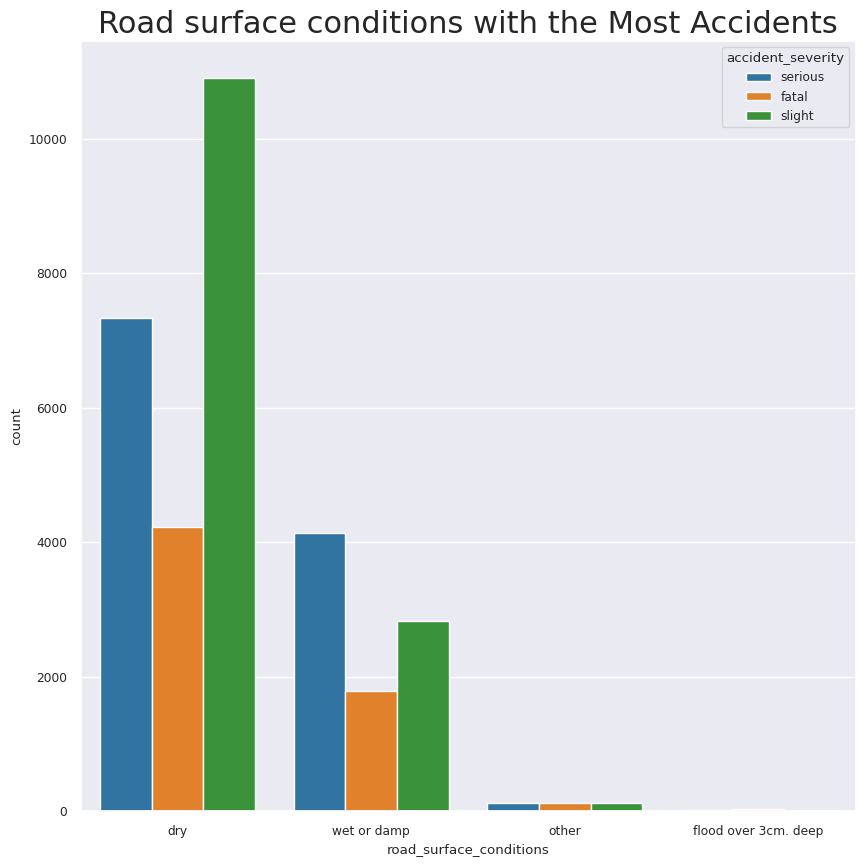

In [168]:
# Road surface conditions with the Most Accidents in a view of severity 
import seaborn as sns
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="road_surface_conditions", 
              data=dataset, 
              order=dataset['road_surface_conditions'].value_counts().index, 
              hue='accident_severity',
              palette='tab10')
plt.title("Road surface conditions with the Most Accidents", fontsize = 22)
plt.show()

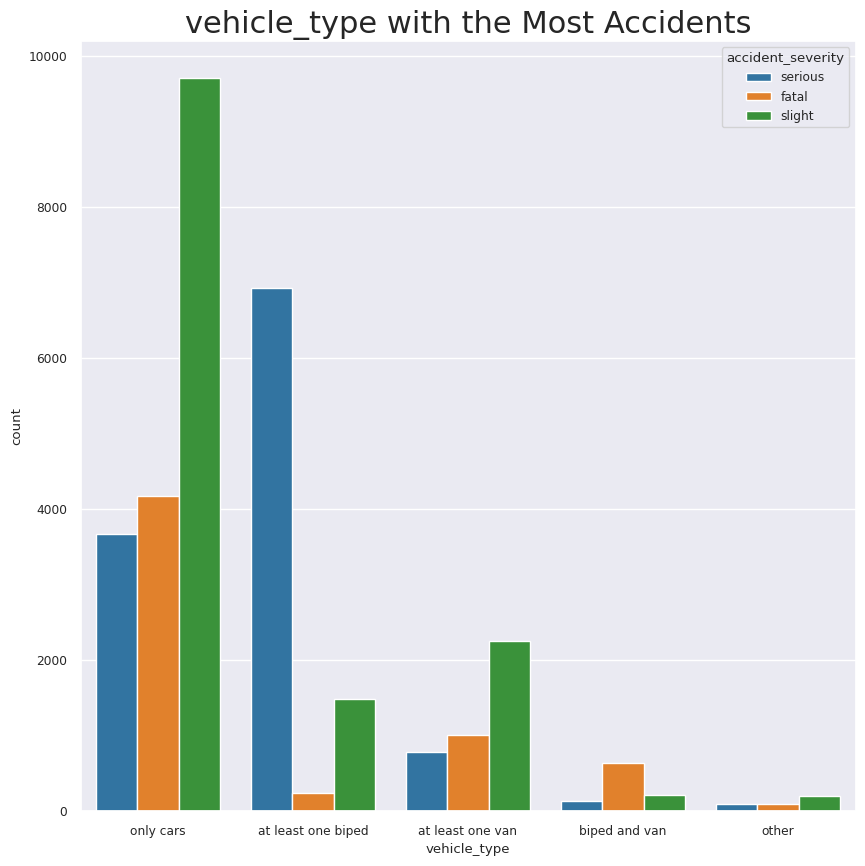

In [169]:
# Vehicle types with the Most Accidents in a view of severity 
import seaborn as sns
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="vehicle_type", 
              data=dataset, 
              order=dataset['vehicle_type'].value_counts().index, 
              hue='accident_severity',
              palette='tab10')
plt.title("vehicle_type with the Most Accidents", fontsize = 22)
plt.show()

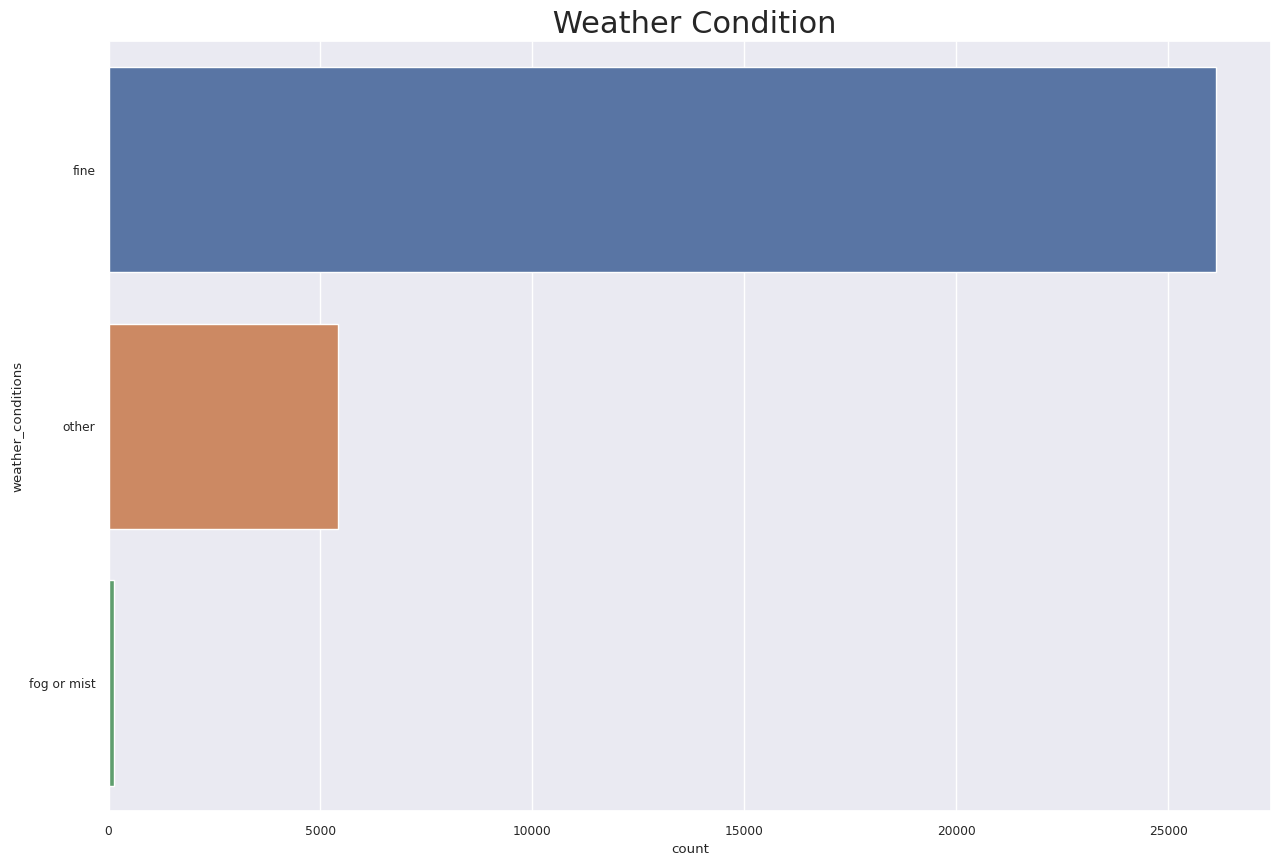

In [170]:
# Weather condition
fig = plt.figure(figsize = (15, 10))
sns.countplot(y='weather_conditions', 
              data=dataset, 
              order=dataset['weather_conditions'].value_counts()[:15].index)\
.set_title(" Weather Condition", fontsize = 22)
plt.show()

<Axes: >

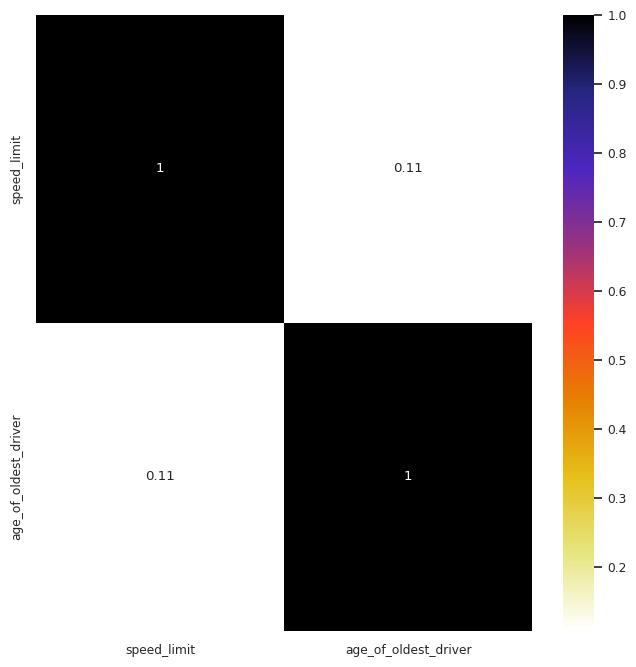

In [171]:
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [172]:
print(dataset.columns)

Index(['speed_limit', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_of_oldest_driver', 'accident_severity'],
      dtype='object')


In [173]:
dataset['accident_severity'] = dataset['accident_severity'].astype(str)


In [174]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [176]:
#Text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import brown

tdummy = dataset.copy()

# Tokenization
tdummy["text_tokens"] = tdummy["accident_severity"].apply(word_tokenize)

# Stemming
stemmer = PorterStemmer()
tdummy["stemmed_text"] = tdummy["text_tokens"].apply(lambda x: [stemmer.stem(word) for word in x])

# Remove stop words
stop_words = set(stopwords.words("english"))
tdummy["text_no_stop"] = tdummy["text_tokens"].apply(lambda x: [word for word in x if not word in stop_words])

tdummy

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity,text_tokens,stemmed_text,text_no_stop
0,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63,serious,[serious],[seriou],[serious]
1,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82,fatal,[fatal],[fatal],[fatal]
2,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30,serious,[serious],[seriou],[serious]
3,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,30,serious,[serious],[seriou],[serious]
4,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39,slight,[slight],[slight],[slight]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30.0,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27,serious,[serious],[seriou],[serious]
31643,60.0,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27,serious,[serious],[seriou],[serious]
31644,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67,slight,[slight],[slight],[slight]
31645,30.0,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24,fatal,[fatal],[fatal],[fatal]


In [177]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
np.random.seed(0)

In [178]:
print(dataset.dtypes)

speed_limit                    float64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver             int64
accident_severity               object
dtype: object


In [179]:
# Normalize numerical variables

scaler = StandardScaler()
numerical_arr = scaler.fit_transform(dataset[numerical_columns])
numerical_df = pd.DataFrame(numerical_arr, columns=numerical_columns)

In [180]:
# One-hot encode categorical variables
onehot = OneHotEncoder(handle_unknown='ignore')
onehot_arr = onehot.fit_transform(dataset[categorical_columns]).toarray()
onehot_df = pd.DataFrame(onehot_arr, columns=onehot.get_feature_names_out(categorical_columns))

In [181]:
# Concatenate the one-hot encoded and normalized dataframes
dataset = pd.concat([onehot_df, numerical_df, dataset[['accident_severity']]], axis=1)


In [182]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [183]:
dataset.dropna(inplace=True)

In [184]:
# Split the data into training, validation, and testing sets
train_val, test = train_test_split(dataset, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)

In [185]:
# Split the data into training, validation, and testing sets
# Define X and y
X = dataset.drop('accident_severity', axis=1)
y = dataset['accident_severity']
class_labels = ["Slight", "Serious", "Fatal"]

# Encode target variable as integer labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Synthetic Minority Oversampling Technique

In [186]:
# Oversample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [187]:
smote

SMOTE(random_state=42)

In [188]:
X_resampled

,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,vehicle_type_at least one biped,...,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,accident_severity_fatal,accident_severity_serious,accident_severity_slight,speed_limit,age_of_oldest_driver
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.247718,-1.195723
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,-0.475085,-1.195723
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,-0.475085,0.864043
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,-0.475085,-1.498629
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,-0.475085,0.439973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33436,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.311368,0.000000,0.000000,1.0,0.0,1.0,0.0,1.468266,1.901909
33437,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,1.693324,1.785727
33438,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,1.693324,1.645555
33439,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,1.693324,0.272432


In [189]:
y_resampled

array([0, 0, 2, ..., 1, 1, 1])

In [190]:
# Undersample using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

##Random Undersampling Technique

In [191]:
rus

RandomUnderSampler(random_state=42)

In [192]:
X_resampled

,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,vehicle_type_at least one biped,...,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,accident_severity_fatal,accident_severity_serious,accident_severity_slight,speed_limit,age_of_oldest_driver
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.247718,-1.195723
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,-1.195723
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,-1.498629
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.416127,-1.316885
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.416127,-0.953397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.475085,-0.165840
14786,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.197888,0.258229
14787,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.475085,1.106368
14788,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.197888,-0.832235


In [193]:
y_resampled

array([0, 0, 0, ..., 2, 2, 2])

##Principle Component Analysis

##Dimensionality Reduction Techniques

In [194]:
# Assume X_train is your training data matrix with shape (n_samples, n_features)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize PCA object with desired number of components
pca = PCA(n_components=2)

# Apply PCA to the standardized data
X_train_pca = pca.fit_transform(X_train_scaled)

In [195]:
# Perform dimensionality reduction using PCA
#dataset.dropna(inplace=True)
pca = PCA(n_components=2)
pca_arr = pca.fit_transform(dataset.drop(['accident_severity'], axis=1))
pca_df = pd.DataFrame(pca_arr, columns=['PCA1', 'PCA2'])
pca_df['accident_severity'] = dataset['accident_severity']
pca


PCA(n_components=2)

In [196]:
pca_df

,PCA1,PCA2,accident_severity
0,-0.174921,0.726780,serious
1,0.724315,1.704788,fatal
2,-0.320008,-0.593683,serious
3,0.110801,-0.574945,serious
4,-0.466760,-0.006878,slight
...,...,...,...
31642,-0.517160,-1.284158,serious
31643,1.029119,-1.044344,serious
31644,2.235557,1.189273,slight
31645,-0.226211,-1.628025,fatal


In [197]:
pca_arr

array([[-0.17492075,  0.72678034],
       [ 0.72431532,  1.7047876 ],
       [-0.32000792, -0.59368262],
       ...,
       [ 2.23555712,  1.1892732 ],
       [-0.22621102, -1.62802463],
       [-1.02997072,  0.59256478]])

In [198]:
dataset

,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,vehicle_type_at least one biped,...,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,accident_severity_fatal,accident_severity_serious,accident_severity_slight,speed_limit,age_of_oldest_driver,accident_severity
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.475085,1.166949,serious
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,2.317994,fatal
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.247718,-0.832235,serious
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.247718,-0.832235,serious
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.475085,-0.287003,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.475085,-1.013979,serious
31643,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.693324,-1.013979,serious
31644,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.416127,1.409275,slight
31645,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,-1.195723,fatal


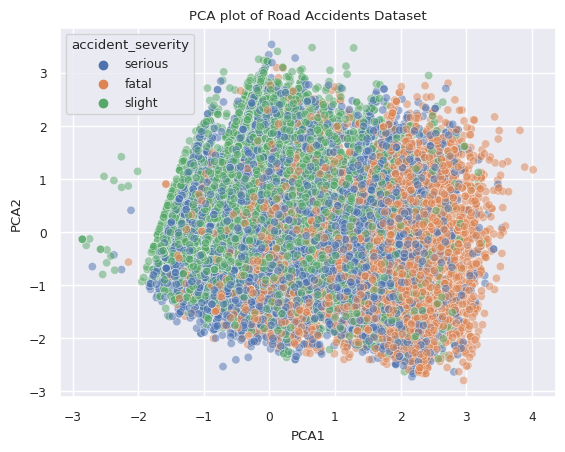

In [199]:
# Visualize the dataset in a 2-dimensional plot
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='accident_severity', alpha=0.5)
plt.title('PCA plot of Road Accidents Dataset')
figsize=(15,15)
plt.show()

#Classification using traditional machine learning

##Random Forest classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Splitting the preprocessed data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluating the classifier on the validation set
y_val_pred = clf.predict(X_val)
print(classification_report(y_val, y_val_pred))

# Evaluating the classifier on the test set
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00      1855
           2       1.00      1.00      1.00      2200

    accuracy                           1.00      5064
   macro avg       1.00      1.00      1.00      5064
weighted avg       1.00      1.00      1.00      5064

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1237
           1       1.00      1.00      1.00      2377
           2       1.00      1.00      1.00      2716

    accuracy                           1.00      6330
   macro avg       1.00      1.00      1.00      6330
weighted avg       1.00      1.00      1.00      6330



In [201]:
dataset

,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,vehicle_type_at least one biped,...,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,accident_severity_fatal,accident_severity_serious,accident_severity_slight,speed_limit,age_of_oldest_driver,accident_severity
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.475085,1.166949,serious
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,2.317994,fatal
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.247718,-0.832235,serious
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.247718,-0.832235,serious
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.475085,-0.287003,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.475085,-1.013979,serious
31643,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.693324,-1.013979,serious
31644,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.416127,1.409275,slight
31645,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,-1.195723,fatal


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint

In [203]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier

In [204]:
# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model performance on the test set
# Confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[1237    0    0]
 [   0 2377    0]
 [   0    0 2716]]


In [205]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Test accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')


Accuracy: 100.00%
Test accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


In [206]:
# Trivial baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_pred)

print(f'Trivial Baseline Accuracy: {dummy_accuracy*100:.2f}%')

Trivial Baseline Accuracy: 42.91%


##Linear Regression

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [208]:
# Fit a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
print("Confusion matrix:")
print(cm)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error (MSE):{mse*100:.2f}%')
print(f'R-squared (R2) score: {r2*100:.2f}%')

# Trivial baseline
dummy_pred = [y_train.mean()] * len(y_test)
dummy_mse = mean_squared_error(y_test, dummy_pred)

print(f'Trivial Baseline MSE: {dummy_mse*100:.2f}%')

Confusion matrix:
[[1237    0    0]
 [   0 2377    0]
 [   0    0 2716]]
Mean squared error (MSE):0.00%
R-squared (R2) score: 100.00%
Trivial Baseline MSE: 57.01%


##K-Nearest Neighbors (KNN)

In [209]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score

In [210]:
# Train and evaluate the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Trivial baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Evaluate the trivial baseline on the testing set
y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Trivial Baseline Accuracy: {accuracy*100:.2f}%')

Confusion matrix:
[[1226    5    6]
 [  13 2362    2]
 [  17   18 2681]]
Accuracy: 99.04%
Trivial Baseline Accuracy: 42.91%


##Support Vector Machine (SVM) 

In [211]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier

In [212]:
# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = svm_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Performance metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision*100:.2f}%')

print(f'Recall: {recall*100:.2f}%')

# Trivial baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_pred)

print(f'Trivial Baseline Accuracy:{dummy_accuracy*100:.2f}%')


Confusion matrix:
[[1237    0    0]
 [   0 2377    0]
 [   0    0 2716]]
Precision: 100.00%
Recall: 100.00%
Trivial Baseline Accuracy:42.91%


#Classification using neural networks

In [213]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [214]:
# Build neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [215]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [216]:
# Train model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop]) #It may take some time

Epoch 1/100
633/633 [==============================] - 4s 4ms/step - loss: 0.2745 - accuracy: 0.8851 - val_loss: 6.6184e-05 - val_accuracy: 1.0000
Epoch 2/100
633/633 [==============================] - 3s 5ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 6.1535e-07 - val_accuracy: 1.0000
Epoch 3/100
633/633 [==============================] - 3s 5ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 1.9303e-08 - val_accuracy: 1.0000
Epoch 4/100
633/633 [==============================] - 3s 5ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 1.1299e-09 - val_accuracy: 1.0000
Epoch 5/100
633/633 [==============================] - 3s 5ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 4.7081e-11 - val_accuracy: 1.0000
Epoch 6/100
633/633 [==============================] - 3s 5ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 4.7081e-11 - val_accuracy: 1.0000
Epoch 7/100
633/633 [==============================] - 3s 4ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.000

In [217]:
# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%') 
print(f'Test loss: {loss*100:.2f}%')
print(f'Test accuracy: {accuracy*100:.2f}%')

198/198 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy: 100.00%
Test loss: 0.00%
Test accuracy: 100.00%


##Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit model on training data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate performance using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 100.00%
Confusion Matrix:
[[1237    0    0]
 [   0 2377    0]
 [   0    0 2716]]


##Random Forest

In [220]:
# Define model hyperparameters
n_estimators = 100
criterion = 'gini'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_features = 'auto'
random_state = 42

# Train the model
rf = RandomForestClassifier(n_estimators=n_estimators,
                             criterion=criterion,
                             max_depth=max_depth,
                             min_samples_split=min_samples_split,
                             min_samples_leaf=min_samples_leaf,
                             max_features=max_features,
                             random_state=random_state)

rf.fit(X_train, y_train)





/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_features='auto', random_state=42)

In [221]:
# Make predictions
y_pred = rf.predict(X_test)

In [222]:
# Evaluate model performance
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(f'Accuracy: {(accuracy_score(y_test, y_pred))*100:.2f}%')
print('Precision:', round(precision_score(y_test, y_pred, average='weighted'), 4))
print('Recall:', round(recall_score(y_test, y_pred, average='weighted'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred, average='weighted'), 4))

Confusion Matrix:
 [[1237    0    0]
 [   0 2377    0]
 [   0    0 2716]]
Accuracy: 100.00%
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [223]:
dataset

,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,vehicle_type_at least one biped,...,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,accident_severity_fatal,accident_severity_serious,accident_severity_slight,speed_limit,age_of_oldest_driver,accident_severity
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.475085,1.166949,serious
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,2.317994,fatal
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.247718,-0.832235,serious
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.247718,-0.832235,serious
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.475085,-0.287003,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.475085,-1.013979,serious
31643,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.693324,-1.013979,serious
31644,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.416127,1.409275,slight
31645,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.475085,-1.195723,fatal


##Keras

In [224]:
from keras.models import Sequential
from keras.layers import Dense

In [225]:
# Generate dummy data
X_train = np.random.rand(100, 10)
y_train = np.random.randint(0, 2, size=100)
X_test = np.random.rand(20, 10)
y_test = np.random.randint(0, 2, size=20)

In [226]:
# Save numpy arrays as files
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [227]:
# Load and preprocess data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss*100:.2f}%')
print(f'Test accuracy: {accuracy*100:.2f}%')

Epoch 1/10
4/4 [==============================] - 1s 52ms/step - loss: 0.6960 - accuracy: 0.5300 - val_loss: 0.6385 - val_accuracy: 0.7000
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6844 - accuracy: 0.5300 - val_loss: 0.6584 - val_accuracy: 0.7000
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.5300 - val_loss: 0.6758 - val_accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6812 - accuracy: 0.5500 - val_loss: 0.6848 - val_accuracy: 0.6500
Epoch 5/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6793 - accuracy: 0.5900 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6773 - accuracy: 0.5900 - val_loss: 0.6865 - val_accuracy: 0.6000
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6758 - accuracy: 0.6000 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 8/10
4/4 [============

##Hyper parameter optimization

In [228]:
# Split the data into training, validation, and testing sets
# Define X and y
X = dataset.drop('accident_severity', axis=1)
y = dataset['accident_severity']

# Encode target variable as integer labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
import tensorflow
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [230]:
# Define the neural network architecture
def create_model(layers, activation, optimizer):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation))
            model.add(Dropout(0.2))
        else:
            model.add(Dense(nodes, activation=activation))
            model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [231]:
# Define neural network model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [232]:
# Train neural network model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
633/633 [==============================] - 2s 2ms/step - loss: -272.2975 - accuracy: 0.3685 - val_loss: -1031.4077 - val_accuracy: 0.3770
Epoch 2/10
633/633 [==============================] - 1s 2ms/step - loss: -3871.3345 - accuracy: 0.3699 - val_loss: -7444.6372 - val_accuracy: 0.3770
Epoch 3/10
633/633 [==============================] - 1s 2ms/step - loss: -14987.2432 - accuracy: 0.3700 - val_loss: -22370.9453 - val_accuracy: 0.3770
Epoch 4/10
633/633 [==============================] - 1s 2ms/step - loss: -36358.5391 - accuracy: 0.3693 - val_loss: -47741.0508 - val_accuracy: 0.3770
Epoch 5/10
633/633 [==============================] - 1s 2ms/step - loss: -69605.7500 - accuracy: 0.3699 - val_loss: -84842.3438 - val_accuracy: 0.3770
Epoch 6/10
633/633 [==============================] - 1s 2ms/step - loss: -115521.6250 - accuracy: 0.3698 - val_loss: -134086.2969 - val_accuracy: 0.3768
Epoch 7/10
633/633 [==============================] - 2s 2ms/step - loss: -174829.4219 - ac

In [233]:
# Get predicted probabilities for test set
y_pred_prob = model.predict(X_test)

# Get predicted class labels for test set
y_pred = np.argmax(y_pred_prob, axis=1)

198/198 [==============================] - 0s 884us/step


In [234]:
# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-234-df3c2d31f0b5>:2: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [235]:
# Define the hyperparameters to tune
layers = [(64,), (128,), (64, 32, 16)]
activations = ['relu', 'sigmoid']
optimizers = ['adam', 'rmsprop']
param_grid = dict(layers=layers, activation=activations, optimizer=optimizers)

In [236]:
# Perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

In [237]:
# Print the best hyperparameters and accuracy score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Compare the performance of the best neural network with the best traditional ML algorithm
best_nn = grid_result.best_estimator_
grid_result_ml = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result_ml.fit(X_train, y_train)
best_ml = grid_result_ml.best_estimator_
nn_accuracy = best_nn.score(X_test, y_test)
ml_accuracy = best_ml.score(X_test, y_test)
print("\nNeural Network Accuracy: %.2f%%" % (nn_accuracy * 100))
print("Best Traditional ML Accuracy: %.2f%%" % (ml_accuracy * 100))

Best: 1.000000 using {'activation': 'relu', 'layers': (64,), 'optimizer': 'adam'}
1.000000 (0.000000) with: {'activation': 'relu', 'layers': (64,), 'optimizer': 'adam'}
1.000000 (0.000000) with: {'activation': 'relu', 'layers': (64,), 'optimizer': 'rmsprop'}
1.000000 (0.000000) with: {'activation': 'relu', 'layers': (128,), 'optimizer': 'adam'}
1.000000 (0.000000) with: {'activation': 'relu', 'layers': (128,), 'optimizer': 'rmsprop'}
1.000000 (0.000000) with: {'activation': 'relu', 'layers': (64, 32, 16), 'optimizer': 'adam'}
1.000000 (0.000000) with: {'activation': 'relu', 'layers': (64, 32, 16), 'optimizer': 'rmsprop'}
0.997472 (0.000457) with: {'activation': 'sigmoid', 'layers': (64,), 'optimizer': 'adam'}
0.999565 (0.000230) with: {'activation': 'sigmoid', 'layers': (64,), 'optimizer': 'rmsprop'}
0.999566 (0.000422) with: {'activation': 'sigmoid', 'layers': (128,), 'optimizer': 'adam'}
1.000000 (0.000000) with: {'activation': 'sigmoid', 'layers': (128,), 'optimizer': 'rmsprop'}
0.9

###Evaluate the model performance using 
a) a confusion matrix
b) two performance metrics
c) a comparison with one “trivial” baseline

[[  44 1193    0]
 [   0 2377    0]
 [   0 2716    0]]


Text(0.5, 1.0, 'Confusion Matrix - Neural Network')

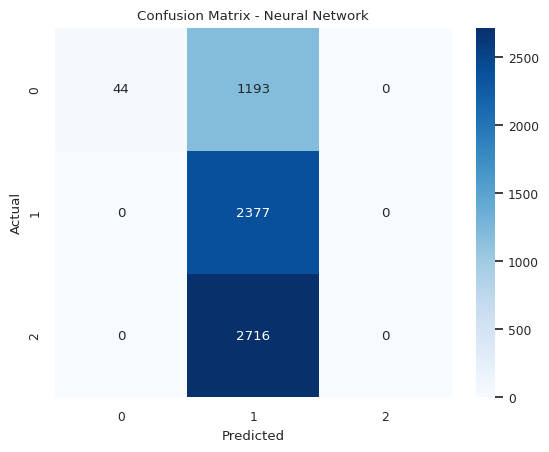

In [243]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential

# Create Keras classifier object
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_prob)
print(cm)

# Confusion matrix for neural network model
cm_nn = confusion_matrix(y_test, y_pred_prob)
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')


In [239]:
# Performance metrics for neural network model
acc_nn = accuracy_score(y_test, y_pred_prob)
f1_nn = f1_score(y_test, y_pred_prob, average='weighted')
prec_nn = precision_score(y_test, y_pred_prob, average='weighted')
rec_nn = recall_score(y_test, y_pred_prob, average='weighted')

# Table for comparison with traditional machine learning model
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [accuracy, acc_nn],
    'F1 Score': [f1, f1_nn],
    'Precision': [precision, prec_nn],
    'Recall': [recall, rec_nn]
})
results.set_index('Model', inplace=True)
display(results)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Accuracy,F1 Score,Precision,Recall
Model,,,,
Logistic Regression,0.400000,1.000000,1.000000,1.000000
Neural Network,0.382464,0.219495,0.337416,0.382464


In [240]:
y_test_df = pd.DataFrame(y_test)

# Trivial baseline comparison
acc_trivial = y_test_df[0].value_counts(normalize=True)[0]
f1_trivial = 0
prec_trivial = y_test_df[0].value_counts(normalize=True)[0]
rec_trivial = 1

# Table for comparison with trivial baseline
results_trivial = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network', 'Trivial Baseline'],
    'Accuracy': [accuracy, acc_nn, acc_trivial],
    'F1 Score': [f1, f1_nn, f1_trivial],
    'Precision': [precision, prec_nn, prec_trivial],
    'Recall': [recall, rec_nn, rec_trivial]
})

results_trivial.set_index('Model', inplace=True)
display(results_trivial)

,Accuracy,F1 Score,Precision,Recall
Model,,,,
Logistic Regression,0.400000,1.000000,1.000000,1.000000
Neural Network,0.382464,0.219495,0.337416,0.382464
Trivial Baseline,0.195419,0.000000,0.195419,1.000000
